### Problema de clustering
En base al set de datos “wine_set.csv” realizar las siguientes tareas que comprenden un proyecto de problema de clustering:
1.	Chequear si en la base existen datos nulos.
2.	Chequear por outliers, en caso de que los haya, excluirlos.
3.	Realizar análisis exploratorio de datos (EDA).
4.	Estandarizar las variables.
5.	Separar en subconjuntos de entrenamiento y de prueba.
6.	Entrenar el o los modelos de clustering elegidos. 
7.	Exponer los resultados del modelo. 
8.	Exponer el modelo y los hiper-parámetros utilizados describiendo porque cree que son los mejores para el problema.
### Datos
- Alcohol: Alcohol
- Malic acid: Ácido málico
- Ash: madera
- Alcalinity of ash: Alcalinidad de la madera
- Magnesium: Magnesio
- Total phenols: Fenoles totales
- Flavanoids: Flavonoides
- Nonflavanoid phenols: Fenoles no flavonoides
- Proanthocyanins: Proantocianidinas
- Color intensity: Intensidad de color
- Hue: Matiz
- OD280/OD315 of diluted wines: índice de absorbancia
- Proline: Prolina


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import scale
from sklearn.datasets import make_blobs 

In [5]:
# mint path
wine = '/home/jorge/Programacion/Ciencia Datos/IFTS11/Ciencia de Datos 2024/Entrega/CienciaDatos/wine_set.csv'
wine = pd.read_csv(wine)

In [6]:
# windows path
# ruta_w = 'C:/Users/yorlu/OneDrive - UTN.BA/Academico/IFTS11-CdD_IA-1/Cursada 2024 IFTS/3er Cuatrimestre/2- Ciencia de datos/Practica/ParcialCienciaDatos/Segundo Parcial/'
# wine = pd.read_csv(ruta_w + 'wine_set.csv')

In [6]:
wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
wine.describe

<bound method NDFrame.describe of      Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue

In [7]:
wine.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

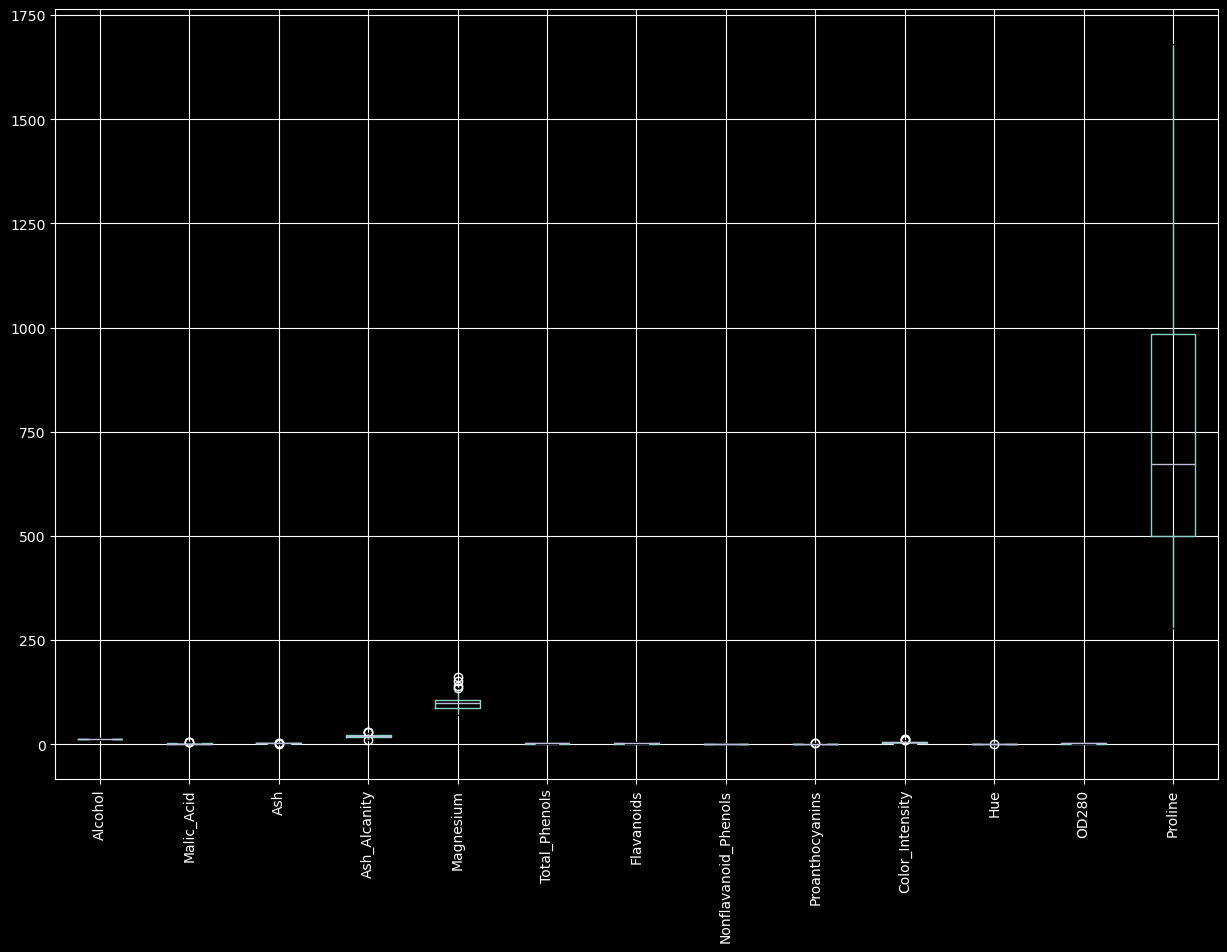

In [8]:
plt.figure(figsize=(15, 10))
wine.boxplot(rot=90)
plt.show()

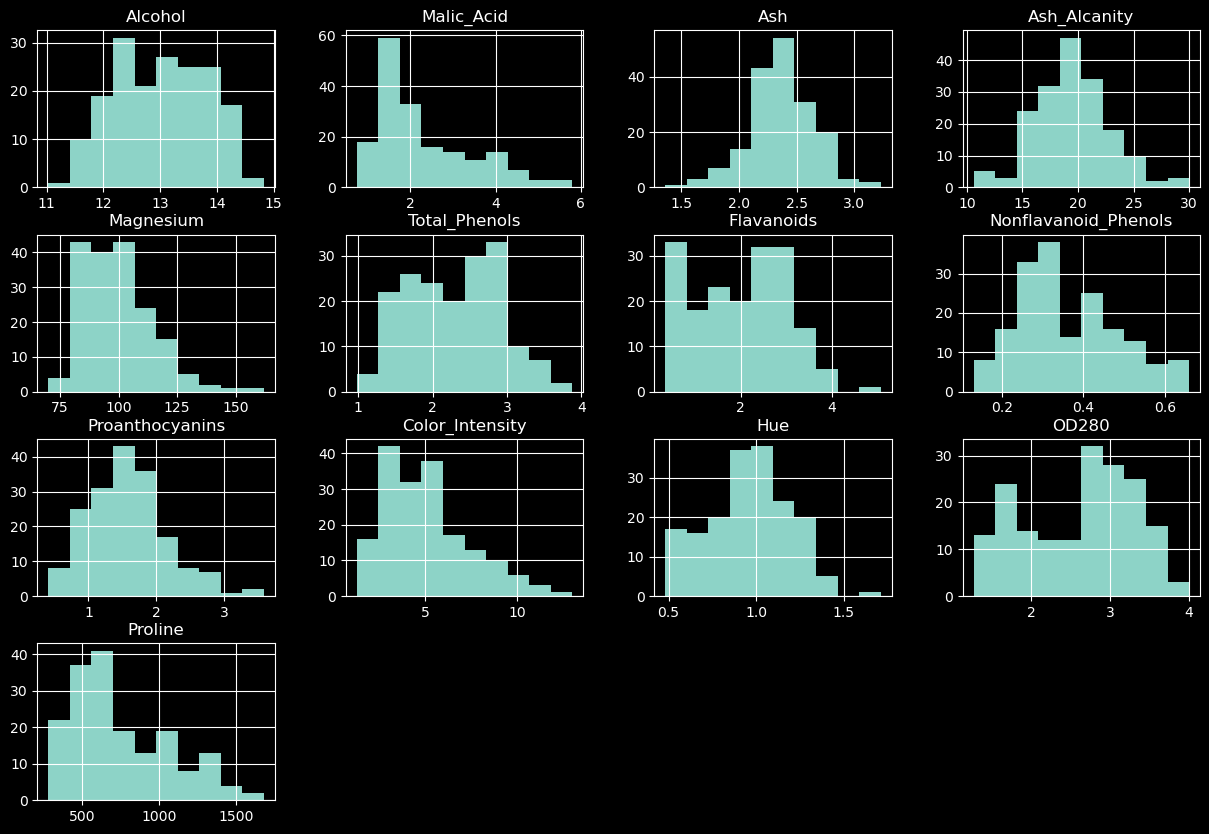

In [9]:
wine.hist(figsize=(15, 10))
plt.show()

# 1-Chequear si en la base existen datos nulos

In [6]:
nulos = wine.isnull().sum()
print(nulos)


Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


In [7]:
wine.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

# 2-Chequear por outliers, en caso de que los haya, excluirlos 